Importing all libraries that will be used in this notebook.

In [1]:
pip install openpyxl

     |████████████████████████████████| 243 kB 866 kB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=6358a8f78fe9b447790a92b7c28ff885f67d5ecab5fcd10e4da7e5d7ff5d0013
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/codstats/CODsalesF2021.xlsx


Importing the Dataset and morphing it into a Pandas dataframe

In [3]:
CODdf = pd.read_excel('/kaggle/input/codstats/CODsalesF2021.xlsx')
print(CODdf)

                               Title  YofRelease  Units Sold (Millions)  \
0                       Call of Duty      2003.0                   4.50   
1                     Call of Duty 2      2005.0                   5.90   
2                     Call of Duty 3      2006.0                   7.20   
3     Call of Duty 4: Modern Warfare      2007.0                  18.90   
4         Call of Duty: World at War      2008.0                  15.94   
5     Call of Duty: Modern Warfare 2      2009.0                  22.70   
6            Call of Duty: Black Ops      2010.0                  26.20   
7     Call of Duty: Modern Warfare 3      2011.0                  26.50   
8          Call of Duty: Black Ops 2      2012.0                  29.59   
9               Call of Duty: Ghosts      2013.0                  28.80   
10     Call of Duty: Advance Warfare      2014.0                  21.78   
11         Call of Duty: Black Ops 3      2015.0                  26.72   
12    Call of Duty: Infin

Creating a seaborn bargraph depicting the amount of units sold from each title.
*Call of Duty Cold War units sold was recorded on 01-01-2021. This doesn't not indicate the amount of units sold to date.*

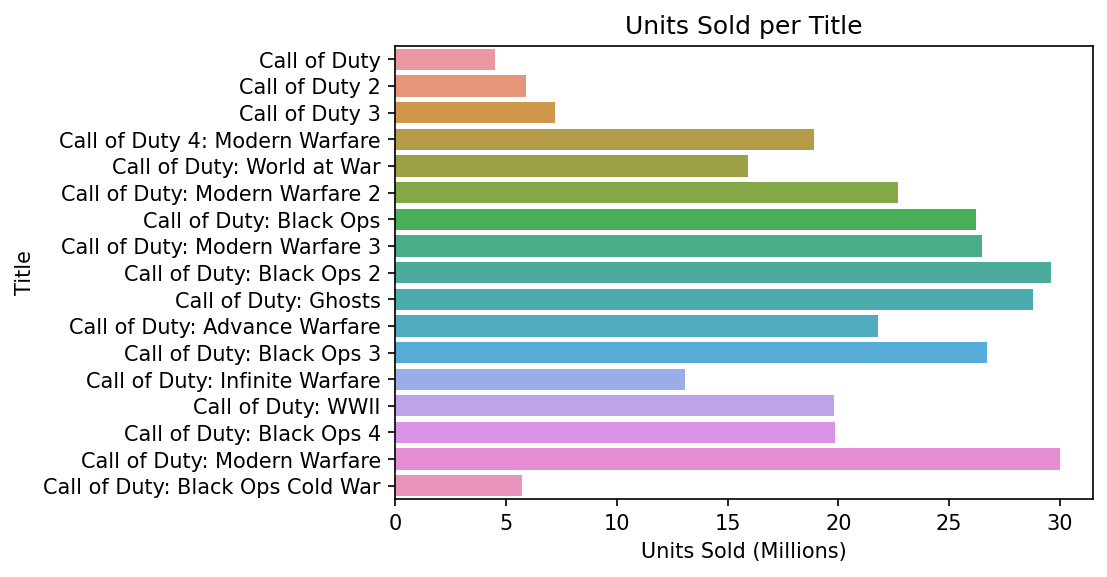

In [4]:
plt.figure(dpi=150)
CODdf = CODdf[:-3]
sns.barplot(x="Units Sold (Millions)", y="Title", data=CODdf)
plt.title('Units Sold per Title')
plt.show()

Creating a pyplot line graph indicating Metacritic rating for P.C., Playstation, and Xbox.
*If the title was released on the current gen. console and next gen console, the rating was record from the next gen console*
Ratings from metacritic.com

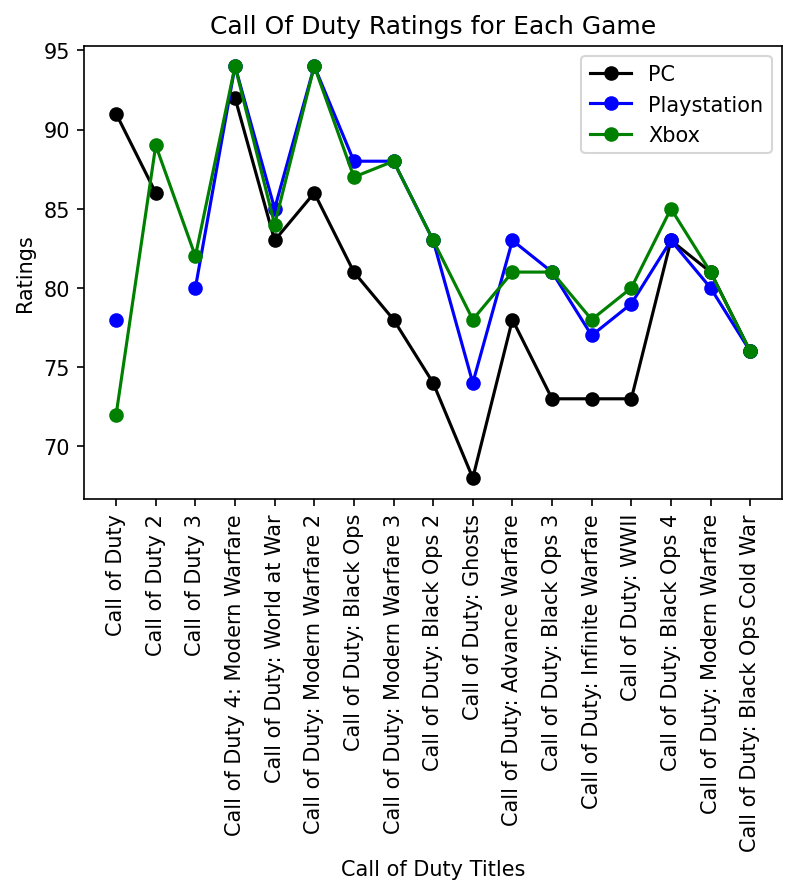

In [5]:
plt.figure(dpi=150)
plt.plot(CODdf['Title'], CODdf['Rating: PC'], color='black', label='PC', marker='o')
plt.plot(CODdf['Title'], CODdf['Rating: PS'], color='blue', label='Playstation', marker='o')
plt.plot(CODdf['Title'], CODdf['Rating: XB'], color='green', label='Xbox', marker='o')
plt.title('Call Of Duty Ratings for Each Game')
plt.ylabel('Ratings')
plt.xlabel('Call of Duty Titles')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Breaking down units sold per rating for each system.

The amount of units sold by Treyarch

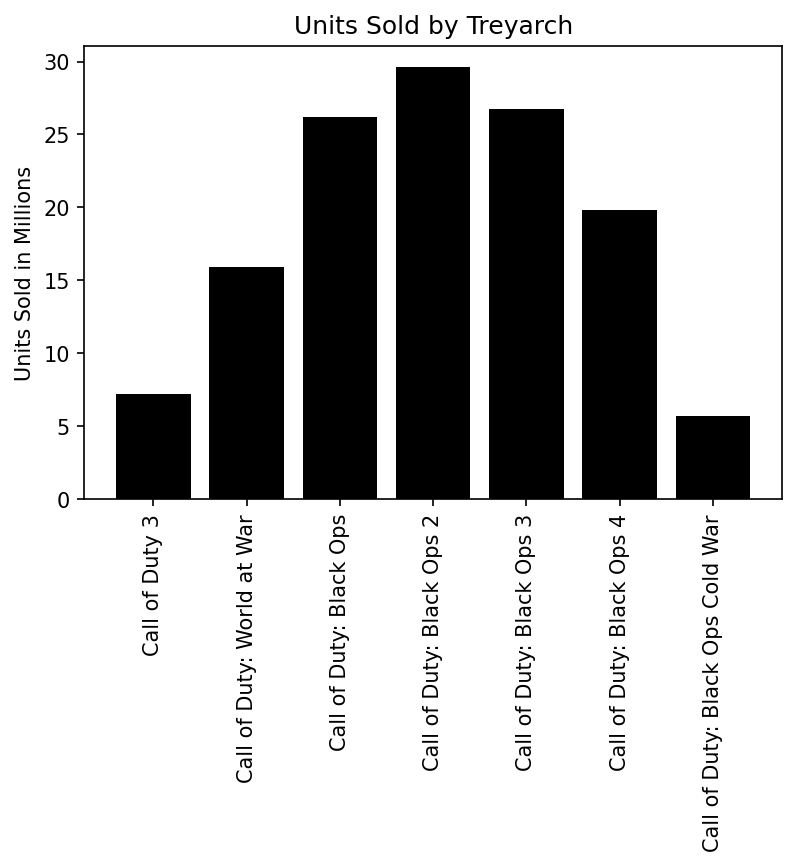

In [6]:
Trey = CODdf[CODdf.Developer == 'Treyarch']
plt.figure(dpi=150)
plt.bar(Trey['Title'], Trey['Units Sold (Millions)'], color='black')
plt.xticks(rotation=90)
plt.ylabel('Units Sold in Millions')
plt.title('Units Sold by Treyarch')
plt.show()

In [7]:
T_arch = CODdf[CODdf.Developer == 'Treyarch']

units_sold_T = int(sum(T_arch['Units Sold (Millions)']))
print("Treyarch has sold", units_sold_T, "million games.")

Treyarch has sold 131 million games.


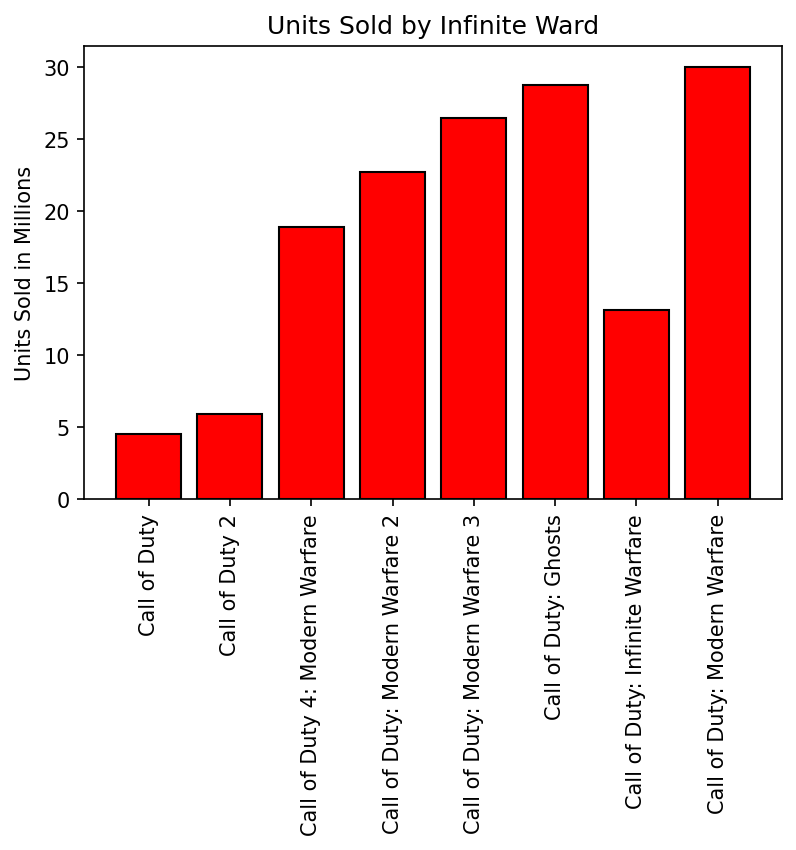

In [8]:
Infini = CODdf[CODdf.Developer == 'Infinite Ward']

plt.figure(dpi=150)
plt.bar(Infini['Title'], Infini['Units Sold (Millions)'], color='red', edgecolor='black')
plt.xticks(rotation=90)
plt.ylabel('Units Sold in Millions')
plt.title('Units Sold by Infinite Ward')
plt.show()

In [9]:
Ifi_ward = CODdf[CODdf.Developer == 'Infinite Ward']

units_sold_I = int(sum(Ifi_ward['Units Sold (Millions)']))
print("Infinite Ward has sold", units_sold_I, "million games.")

Infinite Ward has sold 150 million games.


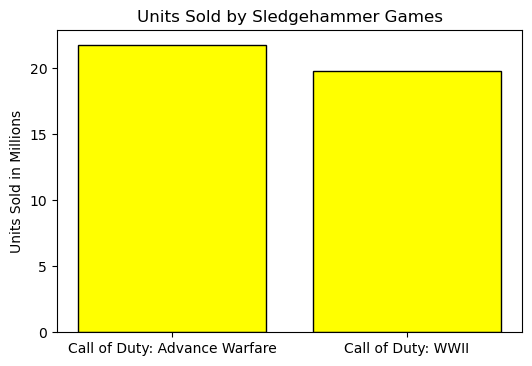

In [10]:
Sledge = CODdf[CODdf.Developer == 'Sledgehammer Games']

plt.figure(dpi=100)
plt.bar(Sledge['Title'], Sledge['Units Sold (Millions)'], color='yellow', edgecolor = 'black')
plt.ylabel('Units Sold in Millions')
plt.title('Units Sold by Sledgehammer Games')
plt.show()

In [11]:
units_sold_S = int(sum(Sledge['Units Sold (Millions)']))
print("Sledgehammer games has sold", units_sold_S, "million games.")

Sledgehammer games has sold 41 million games.


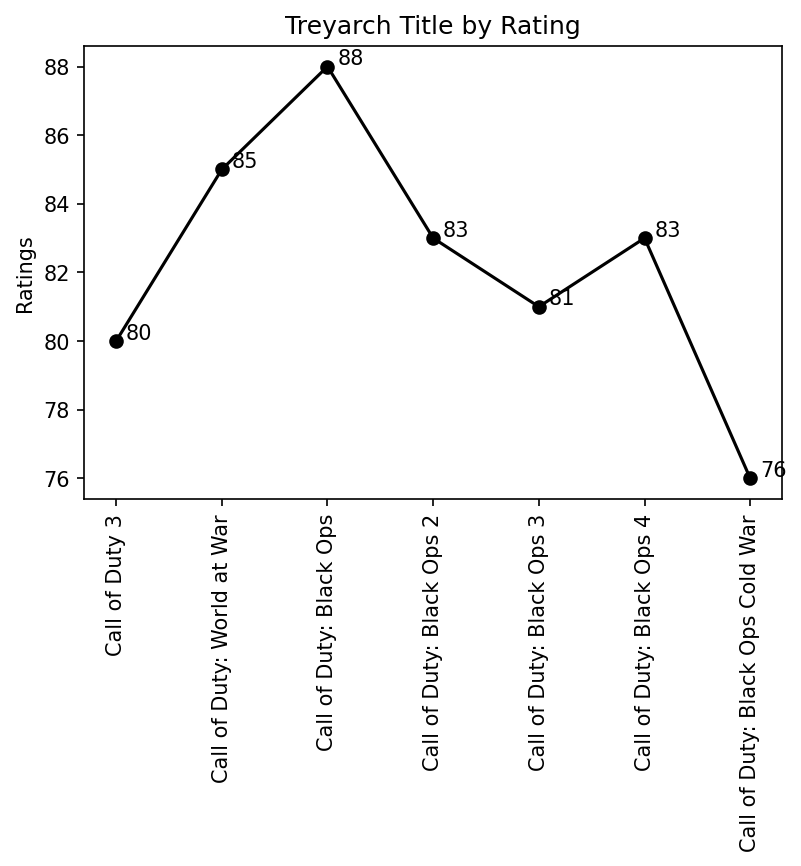

In [12]:
plt.figure(dpi=150)
plt.plot(T_arch['Title'], T_arch['Rating: PS'], color='black', marker='o')
for x,y in zip(T_arch['Title'], T_arch['Rating: PS']):
    label = "{:.0f}".format(y)
    plt.annotate(label,(x,y), textcoords='offset points', xytext=(11,1), ha='center')
plt.title('Treyarch Title by Rating')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()

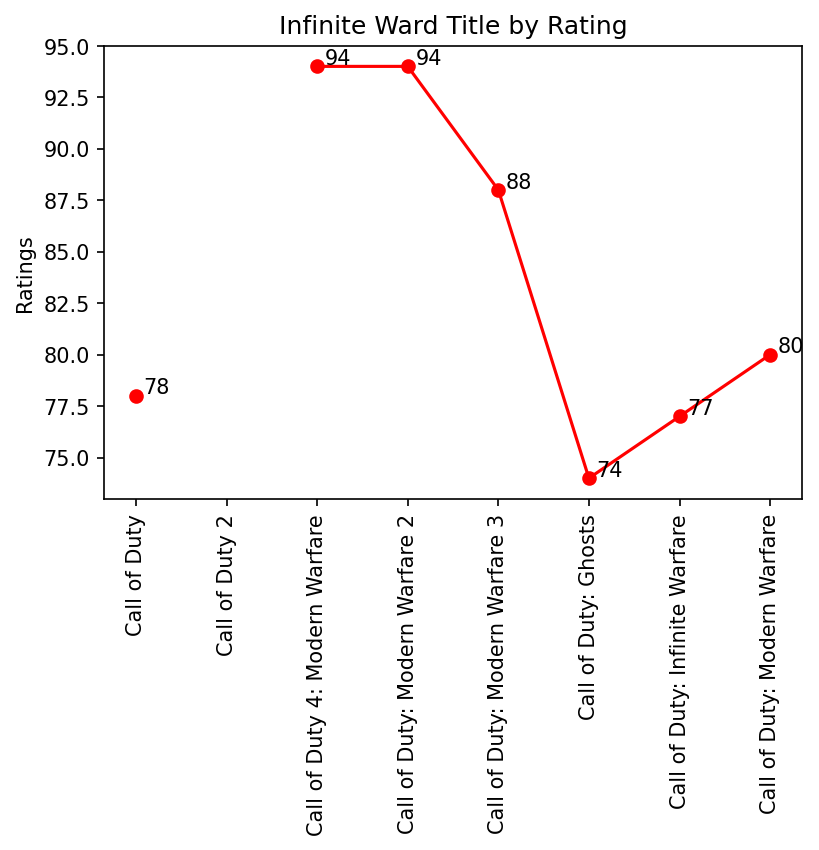

In [13]:
plt.figure(dpi=150)
plt.plot(Ifi_ward['Title'], Ifi_ward['Rating: PS'], color='red', marker='o')
for x,y in zip(Ifi_ward['Title'], Ifi_ward['Rating: PS']):
    label = "{:.0f}".format(y)
    plt.annotate(label,(x,y), textcoords='offset points', xytext=(10,1), ha='center')
plt.ylabel('Ratings')
plt.title('Infinite Ward Title by Rating')
plt.xticks(rotation=90)
plt.show()

In [14]:
Tot_Sold = int(sum(CODdf['Units Sold (Millions)']))
print("In total, the franchise has sold", Tot_Sold, "million games.")

In total, the franchise has sold 323 million games.


In [15]:
Tot_Sold = int(sum(CODdf['Units Sold (Millions)']))
print("In total, the franchise has sold", Tot_Sold, "million games.")

In total, the franchise has sold 323 million games.


In [16]:
revenue = (Tot_Sold * 59.99) * 1000000
print("The Call of Duty franchise has generated approximatley $", int(revenue))

The Call of Duty franchise has generated approximatley $ 19376770000


In [17]:
CODdf = CODdf[3:]
CODdf

,Title,YofRelease,Units Sold (Millions),Rating: PC,Rating: PS,Rating: XB,Player Count (Millions),Developer,Unnamed: 8,Unnamed: 9
3,Call of Duty 4: Modern Warfare,2007.0,18.90,92.0,94.0,94.0,55.0,Infinite Ward,NaN,NaN
4,Call of Duty: World at War,2008.0,15.94,83.0,85.0,84.0,41.9,Treyarch,NaN,NaN
5,Call of Duty: Modern Warfare 2,2009.0,22.70,86.0,94.0,94.0,86.4,Infinite Ward,NaN,NaN
6,Call of Duty: Black Ops,2010.0,26.20,81.0,88.0,87.0,107.0,Treyarch,NaN,NaN
7,Call of Duty: Modern Warfare 3,2011.0,26.50,78.0,88.0,88.0,81.5,Infinite Ward,NaN,NaN
8,Call of Duty: Black Ops 2,2012.0,29.59,74.0,83.0,83.0,110.3,Treyarch,NaN,NaN
9,Call of Duty: Ghosts,2013.0,28.80,68.0,74.0,78.0,66.3,Infinite Ward,NaN,NaN
10,Call of Duty: Advance Warfare,2014.0,21.78,78.0,83.0,81.0,60.2,Sledgehammer Games,NaN,NaN
11,Call of Duty: Black Ops 3,2015.0,26.72,73.0,81.0,81.0,107.3,Treyarch,NaN,NaN
12,Call of Duty: Infinite Warfare,2016.0,13.10,73.0,77.0,78.0,45.5,Infinite Ward,NaN,NaN


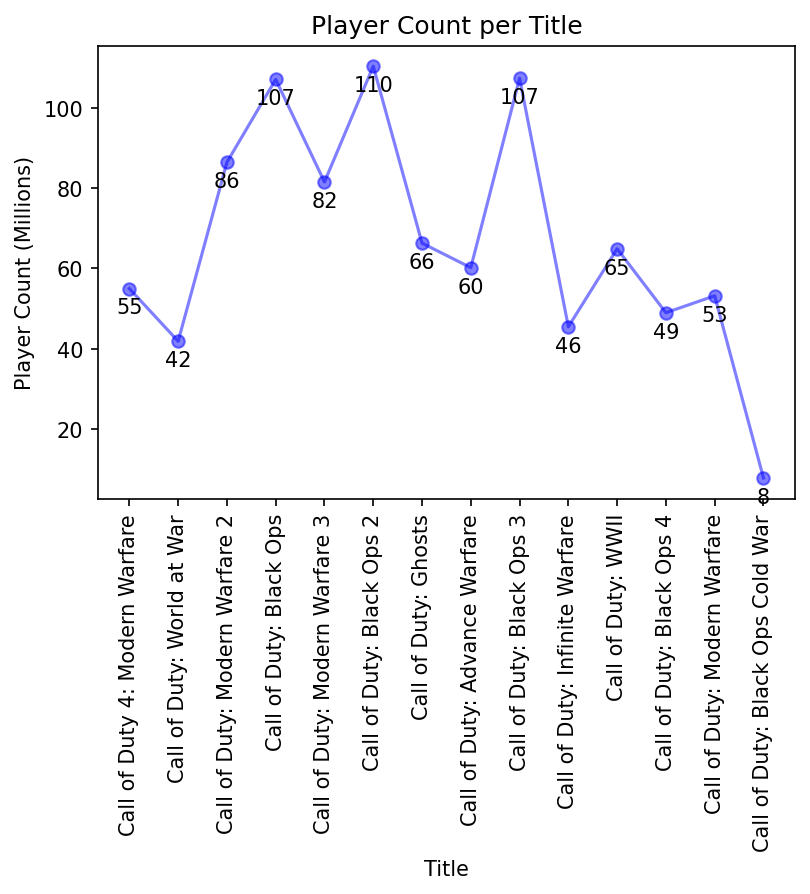

In [18]:
plt.figure(dpi=150)
plt.plot(CODdf['Title'], CODdf['Player Count (Millions)'], color='blue', marker='o', alpha=0.5)
for x,y in zip(CODdf['Title'], CODdf['Player Count (Millions)']):
    label = "{:.0f}".format(y)
    plt.annotate(label,(x,y), textcoords='offset points', xytext=(0,-12), ha='center')
plt.title('Player Count per Title')
plt.ylabel('Player Count (Millions)')
plt.xlabel('Title')
plt.xticks(rotation=90)
plt.show()